<a href="https://colab.research.google.com/github/juan46buitrago/ia_2025/blob/main/clase6_arboles_de_decision%20con%20diabetes%20idians.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AGENDA
1. objetivo de estudio
2. Exploracion de datos EDA
3.Limpieza de datos
4. entrenar el modelo (arbol de decicion)
5. evaluar metod

In [112]:
#tratamiento de datos
import pandas as pd
import numpy as np

#visualizacion de datos
import matplotlib.pyplot as plt
import seaborn as sns
#modelo
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, roc_auc_score, classification_report
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [66]:
datos=pd.read_csv("https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/Advertising_Web.csv")
datos.head()

,Unnamed: 0,X,TV,Radio,Newspaper,Web,Sales
0,1,1,230.1,37.8,69.2,306.634752,22.1
1,2,2,44.5,39.3,45.1,302.653070,10.4
2,3,3,17.2,45.9,69.3,49.498908,9.3
3,4,4,151.5,41.3,58.5,257.816893,18.5
4,5,5,180.8,10.8,58.4,195.660076,12.9


#objetivo
crear y evaluar un modelo de arbol de decision para predecir lasventas con datos simulados de una empres, dependiente de la inversion relaizadas em publicidad

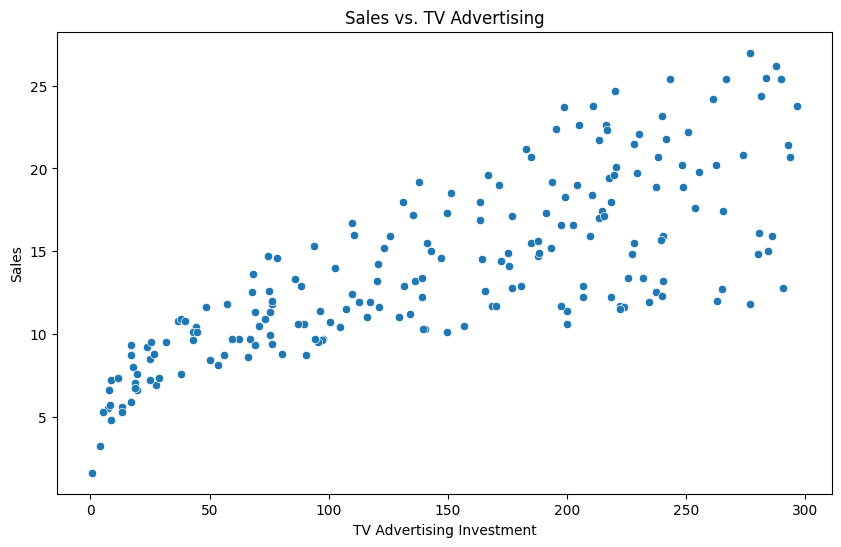

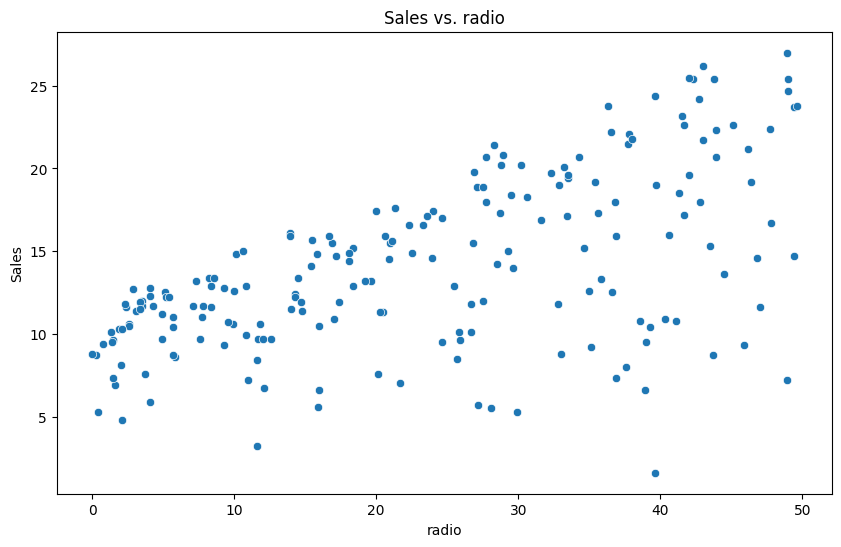

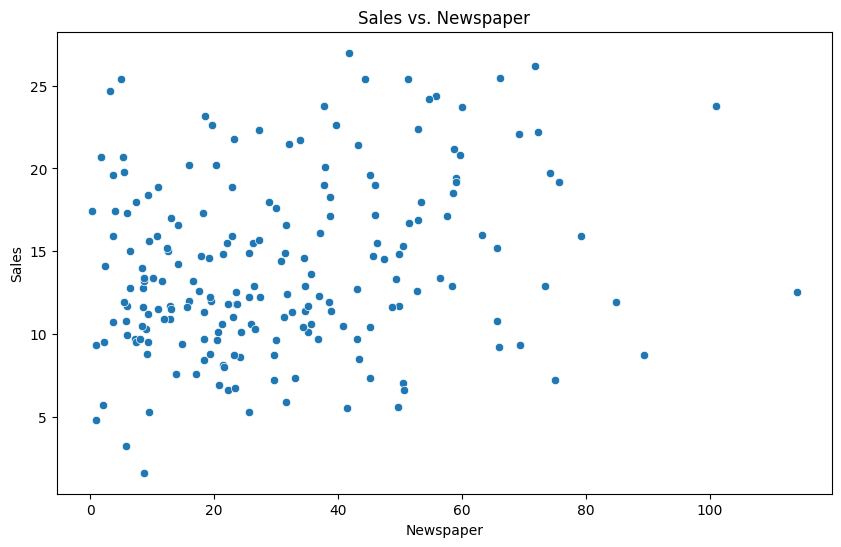

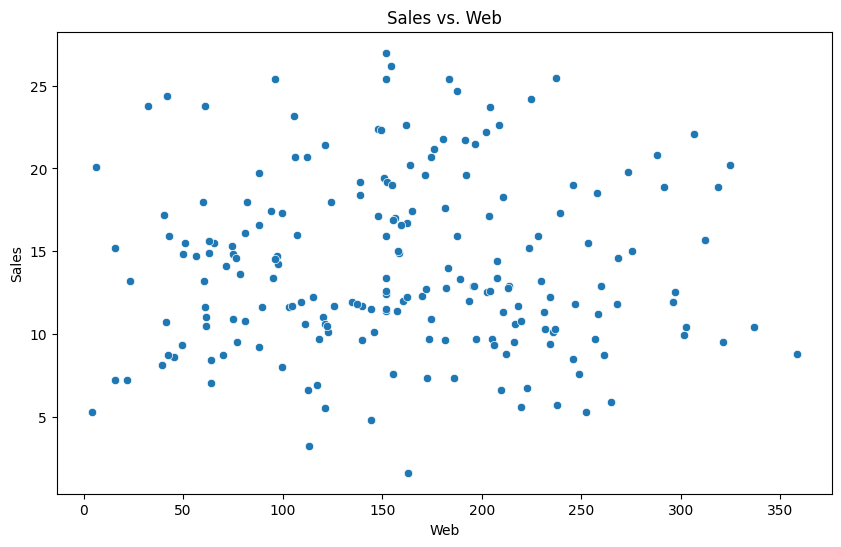

In [67]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TV', y='Sales', data=datos)
plt.title('Sales vs. TV Advertising')
plt.xlabel('TV Advertising Investment')
plt.ylabel('Sales')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Radio', y='Sales', data=datos)
plt.title('Sales vs. radio')
plt.xlabel('radio')
plt.ylabel('Sales')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Newspaper', y='Sales', data=datos)
plt.title('Sales vs. Newspaper')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Web', y='Sales', data=datos)
plt.title('Sales vs. Web')
plt.xlabel('Web')
plt.ylabel('Sales')
plt.show()

##2 explracion de datos EDA

In [68]:
print("obsevaciones y variables:",datos.shape)

obsevaciones y variables: (200, 7)


In [69]:
datos.dtypes

,0
Unnamed: 0,int64
X,int64
TV,float64
Radio,float64
Newspaper,float64
Web,float64
Sales,float64


In [70]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   X           200 non-null    int64  
 2   TV          200 non-null    float64
 3   Radio       200 non-null    float64
 4   Newspaper   200 non-null    float64
 5   Web         200 non-null    float64
 6   Sales       200 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 11.1 KB


se describen como variables independientesTV, radio, newspaper y web como variable dependiente

las variables independientes son:


*   TV: costos depublicidad en tv(miles dolares)
*   Radio.costos de publicidad inverido en radio(miles dolares)
*   newpapaer: costos depublicidad en newspaper(miles dolares)
*   web:costos de publicidad inverido en web(miles dolares)



#limpiza de datos

In [71]:
datos=datos[["TV","Radio","Newspaper","Web","Sales"]]
datos.describe()

,TV,Radio,Newspaper,Web,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,159.587355,14.022500
std,85.854236,14.846809,21.778621,76.815266,5.217457
min,0.700000,0.000000,0.300000,4.308085,1.600000
25%,74.375000,9.975000,12.750000,99.048767,10.375000
50%,149.750000,22.900000,25.750000,156.862154,12.900000
75%,218.825000,36.525000,45.100000,212.311848,17.400000
max,296.400000,49.600000,114.000000,358.247042,27.000000


#Datos de entrenamiento y datos de validacion(entrenamiento modelo)

se emplea la semilla 1279 (random_state=2022)lods datos se dstribuyem de la siguiente manera:


*   70% para entrenamiento
*   30% para validacion del modelo



In [72]:
x_entrena,X_valida,Y_entrena,y_valida=train_test_split(datos.drop(columns="Sales"),datos["Sales"],train_size=.7,random_state=1279)

In [73]:
x_entrena.shape

(140, 4)

## 4.1 Modelo El arbol de decision

La clase DecisionTreeregressor del modulo sklearn:ress tinne el siguiente parametros
* max_depth:profundidad maxima que puede alcanzar el arbol
* cax_sample_split:numero minimo de observaciones que debe detneer el nodo para uqe pueda dividirse de entrenamiento.cell
* min_samples_lead:numero minimo de observaciiones que debe tner cada un de los nodos hijos porque se produzca divisiones
* max_leaf

In [74]:
modelos_ar=DecisionTreeRegressor(max_depth=3,random_state=2022)

usamos los datos de entrenamiento (X_ENTRENA, y_ENTRENA) con el modelo del arbl regresion

In [75]:
modelos_ar.fit(x_entrena,Y_entrena)

DecisionTreeRegressor(max_depth=3, random_state=2022)

In [76]:
## 4.2 vISUALIZACION DEL Modelo

In [77]:
print(f"profundidad del arbol: {modelos_ar.get_depth()}")
print(f"numero de nodos terminales: {modelos_ar.get_n_leaves()}")

profundidad del arbol: 3
numero de nodos terminales: 8


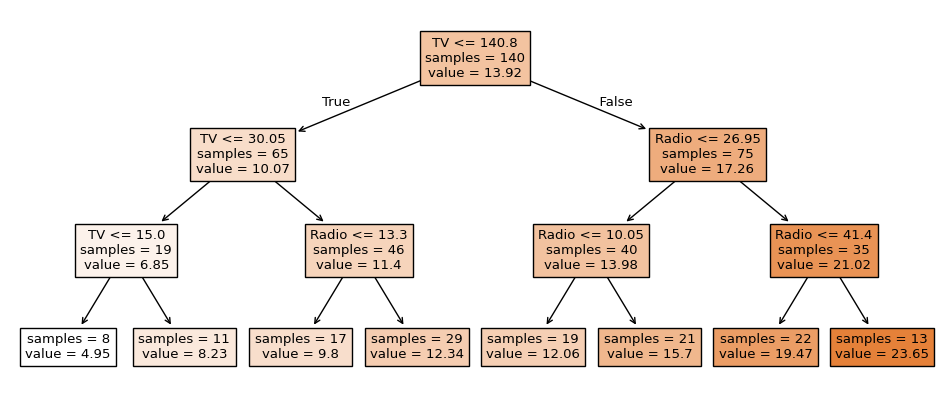

In [78]:
fig,ax=plt.subplots(figsize=(12,5))
plot=plot_tree(
    decision_tree=modelos_ar,
    feature_names=datos.drop(columns="Sales").columns,

    filled=True,
    impurity=False,

    precision=2,
 ax=ax
    )


In [79]:
texto_modelo=export_text(
    decision_tree=modelos_ar,
    feature_names=datos.drop(columns="Sales").columns
)
print(texto_modelo)

|--- TV <= 140.80
|   |--- TV <= 30.05
|   |   |--- TV <= 15.00
|   |   |   |--- value: [4.95]
|   |   |--- TV >  15.00
|   |   |   |--- value: [8.23]
|   |--- TV >  30.05
|   |   |--- Radio <= 13.30
|   |   |   |--- value: [9.80]
|   |   |--- Radio >  13.30
|   |   |   |--- value: [12.34]
|--- TV >  140.80
|   |--- Radio <= 26.95
|   |   |--- Radio <= 10.05
|   |   |   |--- value: [12.06]
|   |   |--- Radio >  10.05
|   |   |   |--- value: [15.70]
|   |--- Radio >  26.95
|   |   |--- Radio <= 41.40
|   |   |   |--- value: [19.47]
|   |   |--- Radio >  41.40
|   |   |   |--- value: [23.65]



## 4.3 predicciones
La importancia de cada predictor en el modelo se calcula como la reducuccion total (normalizada) en el criterio dedivision: en este caso el mas que cosique el predictos divisiones en la que participe: si un predictos no se ha selecciona en ninguna dividion

In [80]:
importacia_predictor=pd.DataFrame(
    {
        "predictor":datos.drop(columns="Sales").columns,
        "importancia":modelos_ar.feature_importances_}
)

In [81]:
importacia_predictor.sort_values(by="importancia", ascending=False)

,predictor,importancia
0,TV,0.626264
1,Radio,0.373736
2,Newspaper,0.000000
3,Web,0.000000


In [82]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
from graphviz import Source
from IPython.display import Image,display


In [83]:
display(Image(url="https://miro.medium.com/v2/resize:fit:720/format:webp/1*YYiQed4kj_EZ2qfg_imDWA.png"))



*   CLAS 0: CATEGORIZA A SETOSA Y SON LOS REGISTRIS DEL 0-49
*   CLASE1: SE REFIERE A VERSICOLOR Y Y SON LOS TEGISTROS DEL 50-99
* CLASE2 : SE REFIEERE A VERIGINCA Y SON LOS REGISTROS DEL 100-149



In [84]:
print("Feature name -", iris.feature_names)
print(iris.target)
print("Flor setosa", iris.data[0])
print("Flor setosa", iris.data[0])
print("Flor setosa", iris.data[0])

Feature name - ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Flor setosa [5.1 3.5 1.4 0.2]
Flor setosa [5.1 3.5 1.4 0.2]
Flor setosa [5.1 3.5 1.4 0.2]


In [85]:
import numpy as np
test_indices=[0,1,50,51,100,101]

train_target=np.delete(iris.target,test_indices)
train_data=np.delete(iris.data,test_indices,axis=0)
test_target=iris.target[test_indices]
test_data=iris.data[test_indices]

In [86]:
dtclassifier=tree.DecisionTreeClassifier(random_state=2022)
dtclassifier.fit(train_data,train_target)

DecisionTreeClassifier(random_state=2022)

In [87]:
print("*******resultados*******")
for p in range(len(test_target)):
  print(f"test row {test_indices[p]} belongs to class {test_target[p]}")

*******resultados*******
test row 0 belongs to class 0
test row 1 belongs to class 0
test row 50 belongs to class 1
test row 51 belongs to class 1
test row 100 belongs to class 2
test row 101 belongs to class 2


In [88]:
predicted_target=dtclassifier.predict(test_data)
print("/******predicciones*******")
for p in range(len(test_indices)):
  print(f"test row {test_indices[p] }pertenece{predicted_target[p]}")

/******predicciones*******
test row 0pertenece0
test row 1pertenece0
test row 50pertenece1
test row 51pertenece1
test row 100pertenece2
test row 101pertenece2


#graficando arbol

In [89]:
graph = Source(tree.export_graphviz(dtclassifier,
                                  out_file=None,
                                  feature_names=iris.feature_names,
                                  class_names=iris.target_names,
                                  filled=True,
                                  rounded=True,
                                  special_characters=True))
graph.format = "png"
graph.render("dtree_render", view=True)

'dtree_render.png'

De otra forma

In [90]:
import pandas as pd
import numpy as np

#visualizacion de datos
import matplotlib.pyplot as plt
import seaborn as sns
#modelo
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [91]:
iris2=pd.DataFrame(data=np.c_[iris["data"],iris["target"]],
                   columns=iris["feature_names"]+["target"])
iris2.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
46,5.1,3.8,1.6,0.2,0.0
141,6.9,3.1,5.1,2.3,2.0
97,6.2,2.9,4.3,1.3,1.0
125,7.2,3.2,6.0,1.8,2.0
16,5.4,3.9,1.3,0.4,0.0


In [92]:
print(f"Tamño del data frame{iris2.shape}")

Tamño del data frame(150, 5)


In [93]:
x_train,x_test,Y_train,Y_test=train_test_split(iris2.drop(columns="target"),iris2["target"],train_size=7, random_state=1279)

In [94]:
modelo_flor=DecisionTreeRegressor(random_state=2022)

In [95]:
modelo_flor.fit(x_train,Y_train)

DecisionTreeRegressor(random_state=2022)

[Text(0.6, 0.8333333333333334, 'petal width (cm) <= 1.9\nsamples = 7\nvalue = 1.14'),
 Text(0.4, 0.5, 'petal length (cm) <= 2.4\nsamples = 5\nvalue = 0.8'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'samples = 1\nvalue = 0.0'),
 Text(0.6, 0.16666666666666666, 'samples = 4\nvalue = 1.0'),
 Text(0.8, 0.5, 'samples = 2\nvalue = 2.0'),
 Text(0.7, 0.6666666666666667, '  False')]

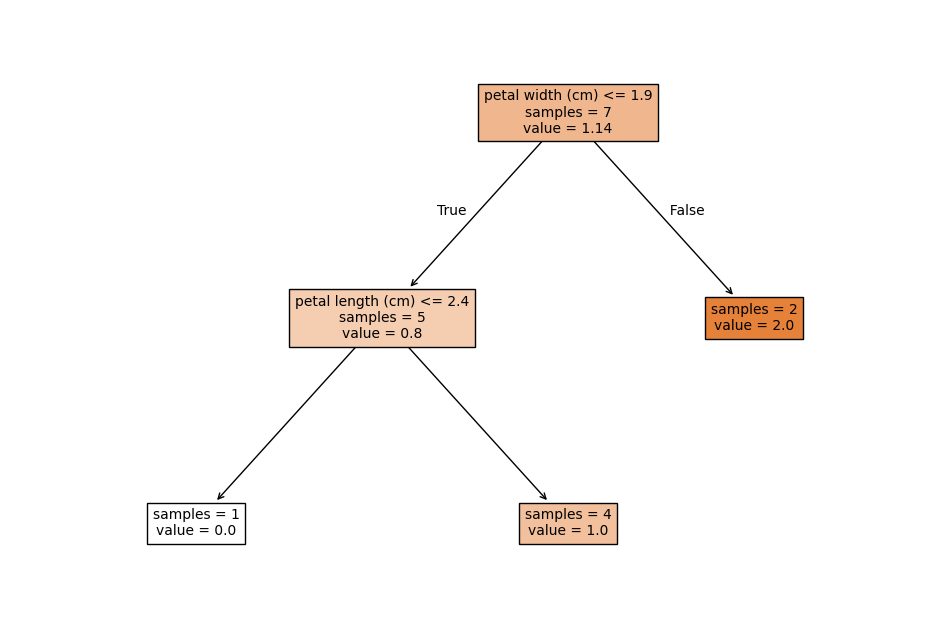

In [96]:
fig,ax=plt.subplots(figsize=(12,8))
plot=plot_tree(
    decision_tree=modelo_flor,
    feature_names=iris2.drop(columns="target").columns,
    filled=True,
    impurity=False,
    fontsize=10,
    precision=2,
    ax=ax
)
plot

In [110]:
#tratamiento de datos
import pandas as pd
import numpy as np

#visualizacion de datos
import matplotlib.pyplot as plt
import seaborn as sns
#modelo
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, roc_auc_score, classification_report
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [97]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'pima-indians-diabetes-database' dataset.
Path to dataset files: /kaggle/input/pima-indians-diabetes-database


In [98]:
pima=pd.read_csv(path+"/diabetes.csv")
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   BMI_Age                   768 non-null    float64
 10  Glucose_Insulin_Ratio     768 non-null    float64
dtypes: float64(8), int64(3)
memory usage: 66.1 KB


In [100]:
df.shape

(768, 11)

In [101]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols] = df[cols].replace(0, np.nan)
df.fillna(df.median(), inplace=True)

print("\nMissing values after cleaning:\n", df.isnull().sum())


Missing values after cleaning:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
BMI_Age                     0
Glucose_Insulin_Ratio       0
dtype: int64


In [104]:
df['BMI_Age'] = df['BMI'] * df['Age']
df['Glucose_Insulin_Ratio'] = df['Glucose'] / (df['Insulin']+1)

print("\nNew features:\n", df[['BMI_Age', 'Glucose_Insulin_Ratio']].head())


New features:
    BMI_Age  Glucose_Insulin_Ratio
0   1680.0               1.174603
1    824.6               0.674603
2    745.6               1.452381
3    590.1               0.936842
4   1422.3               0.810651


In [105]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("\nTraining size:", X_train.shape)
print("Test size:", X_test.shape)


Training size: (614, 10)
Test size: (154, 10)


In [113]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = DecisionTreeClassifier(
    max_depth=4,
    min_samples_split=20,
    class_weight='balanced',
    random_state=42
)

model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4,
                       min_samples_split=20, random_state=42)

In [114]:
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(pd.crosstab(y_test, y_pred,
      rownames=['Actual'],
      colnames=['Predicted']))

Accuracy: 0.7077922077922078
ROC AUC: 0.740925925925926

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.63      0.74       100
           1       0.55      0.85      0.67        54

    accuracy                           0.71       154
   macro avg       0.72      0.74      0.70       154
weighted avg       0.77      0.71      0.71       154


Confusion Matrix:
Predicted   0   1
Actual           
0          63  37
1           8  46


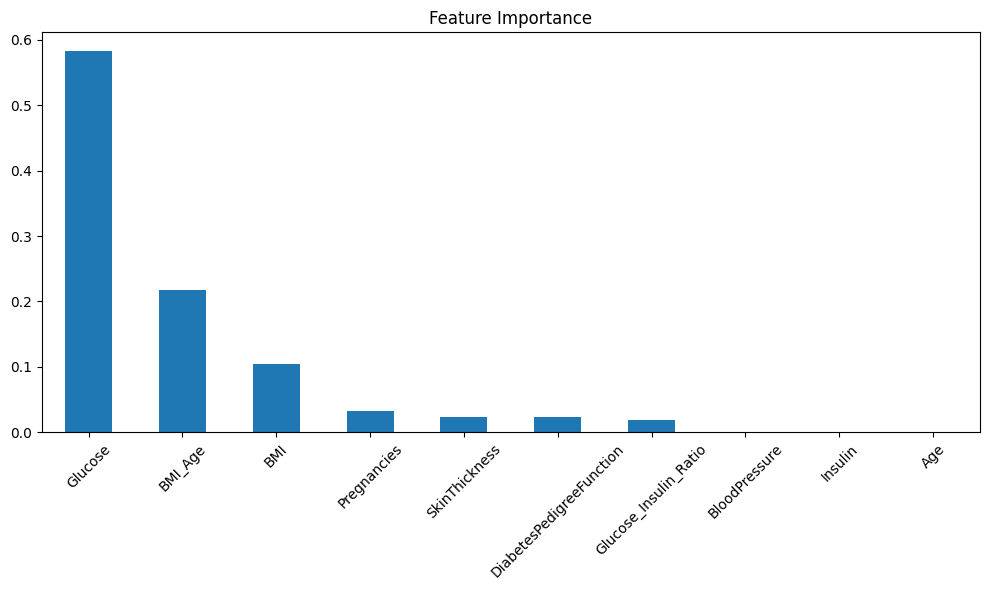

In [115]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10,6))
importances.plot(kind='bar')
plt.title("Feature Importance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [116]:
params = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [10, 20, 30]
}

grid = GridSearchCV(DecisionTreeClassifier(), params, cv=5)
grid.fit(X_train_scaled, y_train)
print("\nBest parameters:", grid.best_params_)


Best parameters: {'max_depth': 3, 'min_samples_split': 20}


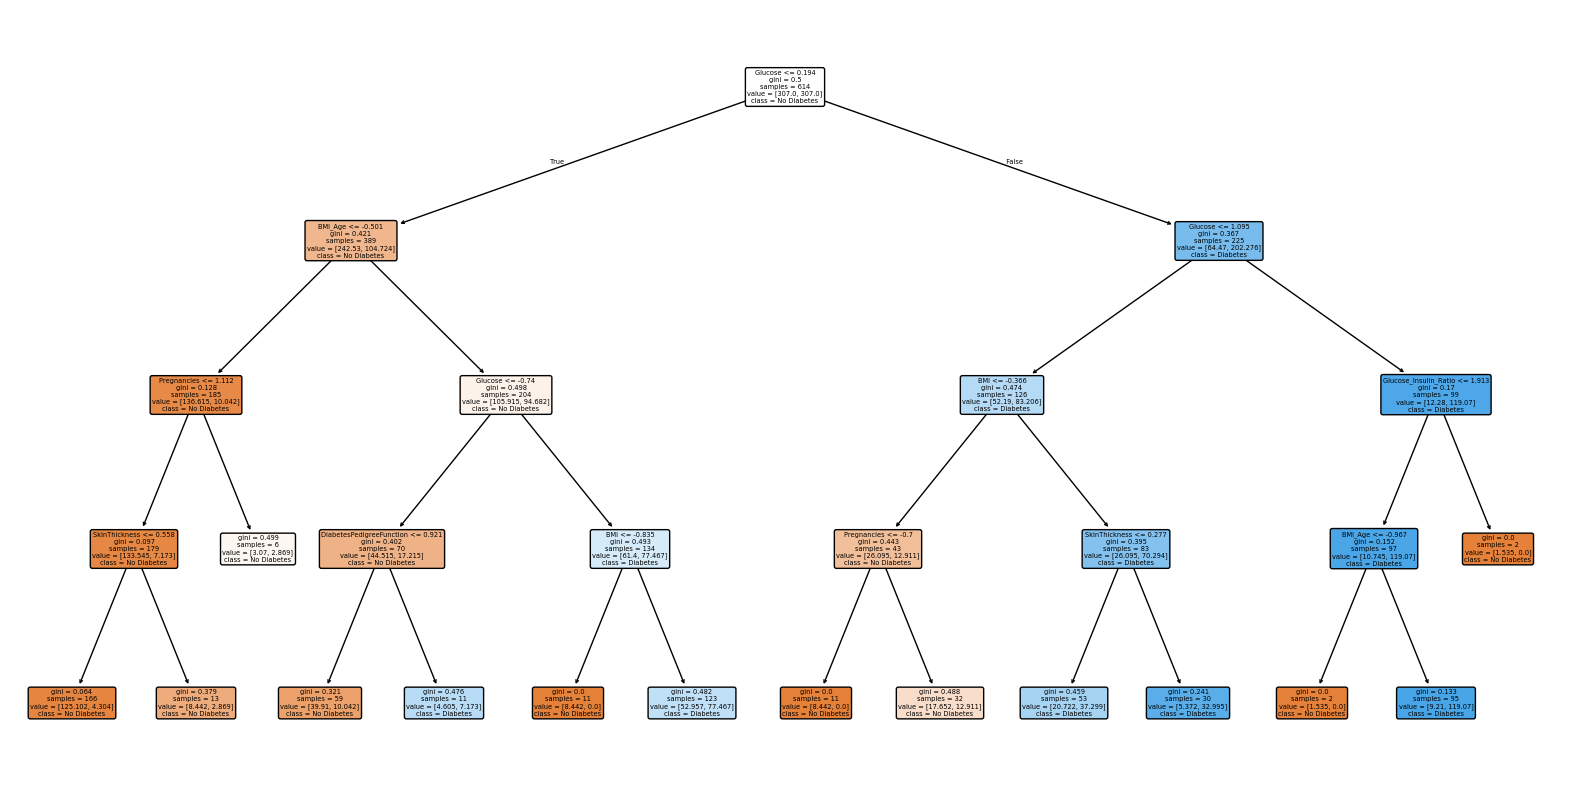

In [117]:
plt.figure(figsize=(20,10))
plot_tree(model,
          feature_names=X.columns,
          class_names=['No Diabetes', 'Diabetes'],
          filled=True,
          rounded=True)
plt.show()